# Preprocessing

## Load Libraries

In [4]:
from util import *
from util.parser import *
from util.img_kit import *
from util.notebook_display import *
from IPython import display
import numpy as np
from scipy import ndimage
from scipy import misc
from os import walk
import os
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (5.0, 5.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
def display_img(fn, name, width=300):
    return display.HTML('<h3>{}</h3> <img src="{}", width={}>'.format(name, fn, width))

In [27]:
def plot_img(img):
    fig = plt.imshow(img)
    plt.axis('off')

## Resize Images

In [6]:
# size = (256, 256)
size = (128, 128)
# img_folder = "data/moving-box/frames/ffmpeg"
img_folder = "data/moving-box/frames/moving-box-uniform/"
output = os.path.join(img_folder, "x".join([str(x) for x in size]))
resize_all(img_folder, output, size)
print("Images in {} resized to {}, \n         saved in {}".format(img_folder, str(size), output))

data/moving-box/frames/moving-box-uniform/128x128 not existing. Just created!
Images in data/moving-box/frames/moving-box-uniform/ resized to (128, 128), 
         saved in data/moving-box/frames/moving-box-uniform/128x128


## Convert Images to Gray Scale

In [8]:
folder = "data/moving-box/frames/moving-box-non-uniform"
# folder = "data/moving-box/frames/moving-box-uniform/128x128"
imgs = imgs_in_folder(folder, "jpg")
sample = imgs[np.random.choice(range(len(imgs)))]
grayed = rgb2gray(sample)
print("original dim: {}".format(sample.shape))
print("grayed   dim: {}".format(grayed.shape))

original dim: (720, 960, 3)
grayed   dim: (720, 960)


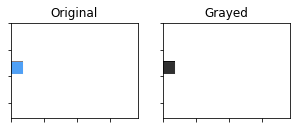

In [9]:
plt.axis('off')
ax = plt.subplot(1, 2, 1)
ax.set_aspect('equal')
disable_axis(ax)
plt.title("Original")
plt.imshow(sample)
ax = plt.subplot(1, 2, 2)
disable_axis(ax)
plt.title("Grayed")
plt.imshow(grayed)

## Save in Compressed way 

Load img from file: shape = (720, 960)


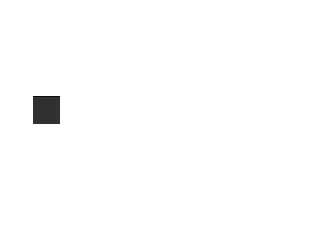

In [35]:
np.savez_compressed("tmp/grayed", imgs = grayed)
grayed_from_file = np.load("tmp/grayed.npz")['imgs']
print("Load img from file: shape = {}".format(grayed_from_file.shape))
plot_img(grayed_from_file)

## Reside All Images, Compress and Save